In [8]:
import pandas as pd
import numpy as np
import error_analysis
data = pd.read_csv('error_data_1mm.csv', sep=' ',decimal='.')
data=data.dropna()     #drop all rows that have any NaN values
data

,real_point_id,reachable_pocket_id,estimated_point_id,C_x,C_y,T_x,T_y,P_x,P_y,X_x,...,X_calculated_x,X_calculated_y,Q_x,Q_y,d,b,a,alpha,beta,delta
0,0,0,0,808.510863,394.503354,687.703953,111.334875,38.447187,38.392915,725.466385,...,725.483165,115.425248,38.153419,41.007746,307.861490,653.341318,291.025930,0.113874,1.055672,2.631281
1,0,0,1,808.510863,394.503354,687.703953,111.334875,38.447187,38.392915,725.466385,...,725.536214,114.901392,37.142577,50.005258,307.861490,653.341318,291.025930,0.113874,1.055672,11.685398
2,0,0,2,808.510863,394.503354,687.703953,111.334875,38.447187,38.392915,725.466385,...,725.532366,114.941969,37.220838,49.308653,307.861490,653.341318,291.025930,0.113874,1.055672,10.984410
3,0,0,3,808.510863,394.503354,687.703953,111.334875,38.447187,38.392915,725.466385,...,725.662357,113.112386,33.693112,80.708959,307.861490,653.341318,291.025930,0.113874,1.055672,42.582259
4,0,0,4,808.510863,394.503354,687.703953,111.334875,38.447187,38.392915,725.466385,...,725.050987,118.349077,43.837977,-9.590538,307.861490,653.341318,291.025930,0.113874,1.055672,48.285323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152845,4949,1,10,494.538776,466.829911,137.650809,317.444137,38.447187,38.392915,150.379514,...,150.400730,353.241337,38.281820,38.451703,386.891627,296.160334,362.417228,0.077650,0.832808,0.175506
152846,4949,1,11,494.538776,466.829911,137.650809,317.444137,38.447187,38.392915,150.379514,...,151.834870,352.697682,27.011810,42.458229,386.891627,296.160334,362.417228,0.077650,0.832808,12.136500
152847,4949,1,12,494.538776,466.829911,137.650809,317.444137,38.447187,38.392915,150.379514,...,151.514878,352.824747,29.543519,41.558198,386.891627,296.160334,362.417228,0.077650,0.832808,9.449568
152848,4949,1,13,494.538776,466.829911,137.650809,317.444137,38.447187,38.392915,150.379514,...,150.421909,353.233787,38.116706,38.510402,386.891627,296.160334,362.417228,0.077650,0.832808,0.350744


### Check a specific configuration

Each row of the dataset represents the resut a random shot with an error due to the vision system

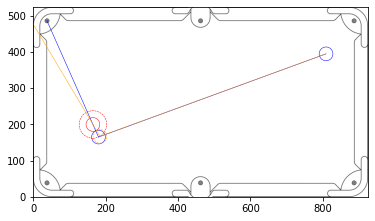

delta: 37.56476225284995


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#index
i=2468

#pool table
img = mpimg.imread('pool_table.png')

#radii pool balls
r=38/2

#pool table dimensions
H=524
W=924

fig, ax = plt.subplots()
ax.set_xlim((0, W))
ax.set_ylim((0, H))

#pockets (unique values columns P_x and P_y)
pockets=data.groupby(['P_x','P_y']).count().reset_index().values[:,:2]

C=(data.iloc[i]['C_x'],data.iloc[i]['C_y'])
T=(data.iloc[i]['T_x'],data.iloc[i]['T_y'])
P=(data.iloc[i]['P_x'],data.iloc[i]['P_y'])
X=(data.iloc[i]['X_x'],data.iloc[i]['X_y'])
C_estimated=(data.iloc[i]['C_estimated_x'],data.iloc[i]['C_estimated_y'])
T_estimated=(data.iloc[i]['T_estimated_x'],data.iloc[i]['T_estimated_y'])
X_calculated=(data.iloc[i]['X_calculated_x'],data.iloc[i]['X_calculated_y'])
Q=(data.iloc[i]['Q_x'],data.iloc[i]['Q_y'])

ax=error_analysis.draw_specific_configuration(ax,W,H,img,pockets,r,C,T,P,X,C_estimated,T_estimated,X_calculated,Q)
ax.plot()  
plt.show()

print('delta:',data.iloc[i]['delta'])

### Dificulty of the shot

We divide our shots in 3 categories depending on the angle: the closest the angle is to 180 degrees, the better


In [10]:
data['difficulty_angle']=np.pi-data['alpha']-data['beta']
data.loc[(data['difficulty_angle']<np.pi) & (data['difficulty_angle']> (5/6)*np.pi), 'difficulty_category'] = 1
data.loc[(data['difficulty_angle']<(5/6)*np.pi) & (data['difficulty_angle']> (4/6)*np.pi), 'difficulty_category'] = 2
data.loc[(data['difficulty_angle']<(4/6)*np.pi) & (data['difficulty_angle']> (3/6)*np.pi), 'difficulty_category'] = 3

### Visualization of data

Scatter plots of some varaible vs delta

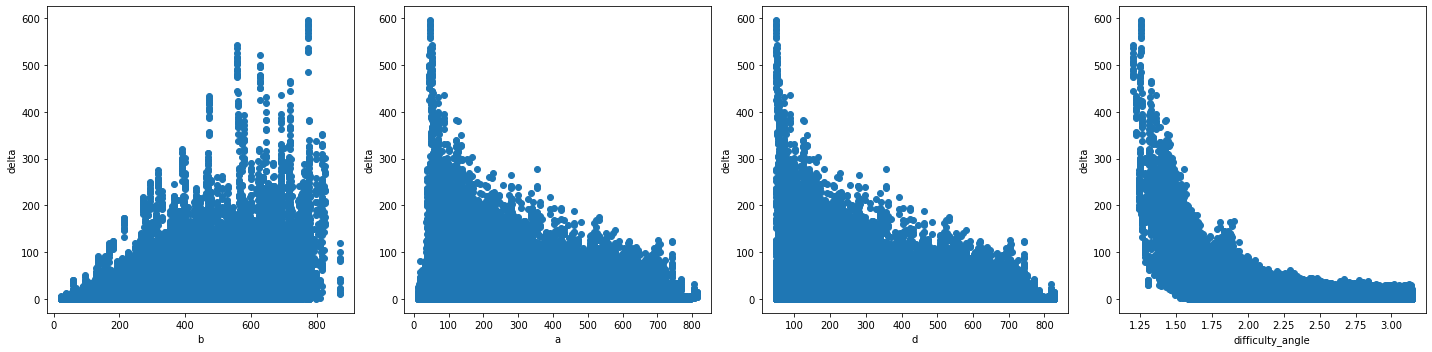

In [11]:
import numpy as np
import matplotlib.pyplot as plt

y = data['delta'].values
x=['b','a','d','difficulty_angle']

fig = plt.figure(1,figsize=(20, 5))

columns = 4
rows = 1

for i,col_name in zip(range(1, columns*rows+1),x):

    x=data[col_name].values
    fig.add_subplot(rows, columns, i)
    plt.scatter(x, y)
    plt.xlabel(col_name)
    plt.ylabel('delta')

plt.tight_layout()
plt.show()

Histograms of delta and its categories

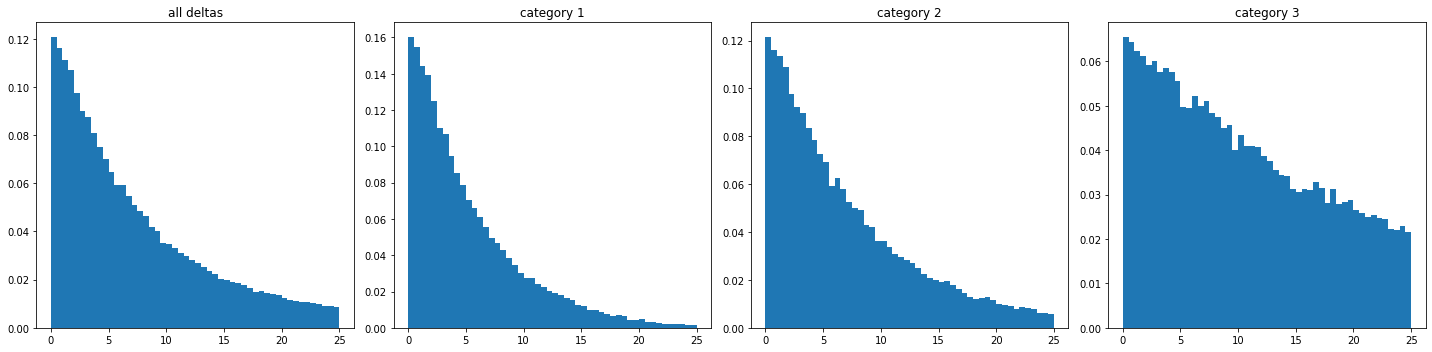

In [12]:
import numpy as np
import matplotlib.pyplot as plt

deltas=data['delta'].values
deltas_category1=data[data['difficulty_category']==1]['delta'].values
deltas_category2=data[data['difficulty_category']==2]['delta'].values
deltas_category3=data[data['difficulty_category']==3]['delta'].values
list_deltas=[deltas,deltas_category1,deltas_category2,deltas_category3]

fig = plt.figure(1,figsize=(20, 5))

columns = 4
rows = 1

for category,i,delta_type in zip(['all deltas', 'category 1', 'category 2', 'category 3'],range(1, columns*rows+1),list_deltas):

    fig.add_subplot(rows, columns, i)
    plt.title(category)
    plt.hist(delta_type, bins=50,range=[0, 25], density=True)

plt.tight_layout()
plt.show()


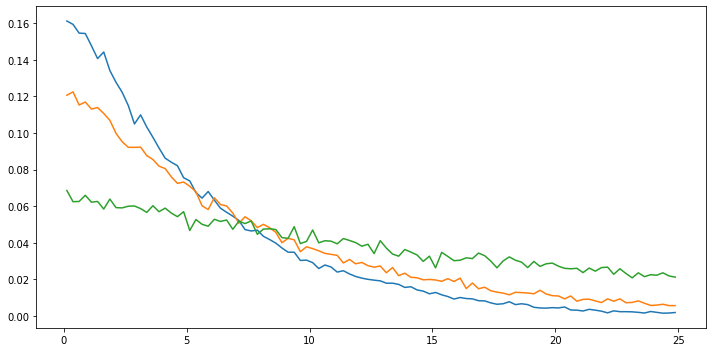

In [13]:
fig = plt.figure(1,figsize=(10, 5))

n,x=np.histogram(deltas_category1, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

n,x=np.histogram(deltas_category2, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

n,x=np.histogram(deltas_category3, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

plt.tight_layout()
plt.show()


### Probability of getting an error below a certain threshold

probability of error below 10mm:  0.8459217980011973


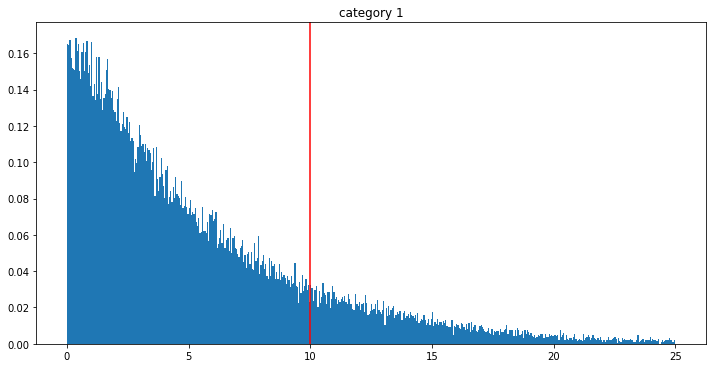

probability of error below 10mm:  0.7466021653996775


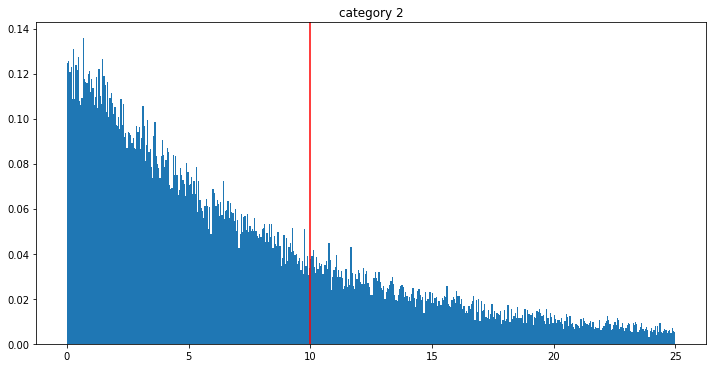

probability of error below 10mm:  0.53826646726055


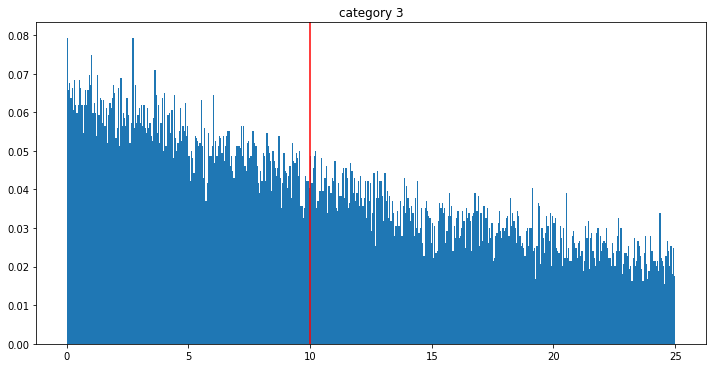

In [14]:
threshold=10
num_bins=500

for category,deltas_category in enumerate([deltas_category1,deltas_category2,deltas_category3]):
    arr_pdf,arr_bins=np.histogram(deltas_category, bins = num_bins,range=[0, 25],density=True)

    #in order to match dimensions of bins and pdf arrays we get rid of last bins element
    arr_bins_cropped=arr_bins[:-1]
    arr_bins_thresholded=arr_bins_cropped[arr_bins_cropped<threshold]

    #in order to have the same dimension between _pdf and np.diff(_bins), _bins need to have one 
    #more element than _pdf (i.e., _pdf need to have one less element than _bins)
    arr_pdf_thresholded=arr_pdf[arr_bins_cropped<threshold][:-1]
    area=np.sum(arr_pdf_thresholded* np.diff(arr_bins_thresholded))
    print(f'probability of error below {threshold}mm: ', area)

    #plot computed probability
    fig = plt.figure(1,figsize=(10, 5))
    plt.hist(deltas_category, bins = num_bins, range=[0, 25],density=True)
    plt.axvline(x=threshold, color='r')
    plt.tight_layout()
    plt.title(f'category {category+1}')
    plt.show()
